In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTEENN
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
#read the encoded dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\cleaned_data.csv")
df.head(9)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,1,23.0,51,5.0,8.97,2.0,0,0,3,1,...,1,2,1,2,0,1,3,10,6.655000,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,...,2,4,1,4,0,1,4,4,5.123958,0
2,1,17.0,44,3.0,7.03,5.0,2,0,5,0,...,1,5,0,4,1,2,3,4,4.190609,0
3,0,17.0,49,3.0,5.59,2.0,1,1,7,1,...,2,1,1,0,1,4,0,9,7.467984,1
4,0,25.0,16,4.0,8.13,3.0,0,1,16,1,...,1,1,1,1,0,4,3,9,0.406585,0
5,1,25.0,39,2.0,5.70,3.0,2,0,12,0,...,3,5,0,4,1,4,2,7,4.207805,1
6,1,24.0,46,3.0,9.54,4.0,1,0,10,0,...,5,3,1,1,0,0,0,4,4.956508,0
7,0,24.0,6,2.0,8.04,4.0,2,3,11,0,...,5,1,1,4,1,2,2,8,9.909730,1
8,1,19.0,33,3.0,9.79,1.0,1,1,2,1,...,2,1,0,2,0,1,3,19,1.486374,1


In [3]:
df["Depression"].value_counts(normalize=True) * 100


Depression
1    69.004947
0    30.995053
Name: proportion, dtype: float64

In [4]:
X= df.drop(['Depression'], axis = 1)
y= df['Depression']


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

CATBOOSTCLASSIFIER

Complete Catboost Training Accuracy: 0.9267206063088897
Complete catboost Test Accuracy: 0.8507765830346475
Confusion Matrix:
 [[2016  595]
 [ 654 5105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      2611
           1       0.90      0.89      0.89      5759

    accuracy                           0.85      8370
   macro avg       0.83      0.83      0.83      8370
weighted avg       0.85      0.85      0.85      8370



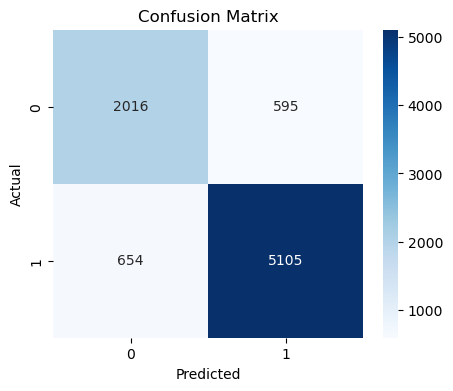

In [6]:
#first model
cat = CatBoostClassifier(verbose=0, random_state=42)


cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

# accuracy
Tr_score = cat.score(X_train, y_train)
Tst_score = cat.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete Catboost Training Accuracy:", Tr_score)
print("Complete catboost Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [7]:
#smote data
X= df.drop(['Depression'], axis = 1)
y= df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(X,y)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

data_2 = pd.concat([X_smote, y_smote],axis=1)

c:\Users\arwah\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled dataset shape: Depression
0    0.643429
1    0.356571
Name: proportion, dtype: float64


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=1)

Train model on the training data and evaluate performance on the test set. 

Complete Catboost Training Accuracy: 0.9981514643868061
Complete catboost Test Accuracy: 0.9735813451947701
Confusion Matrix:
 [[4712   83]
 [ 113 2511]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.97      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



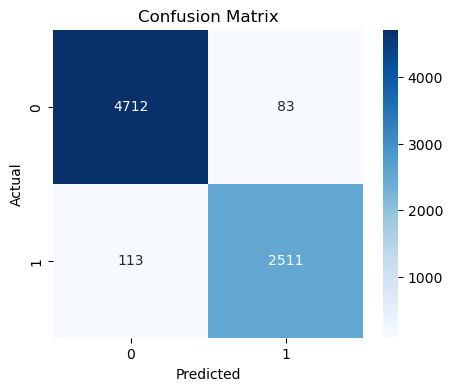

In [9]:
#first model
cat = CatBoostClassifier(verbose=0, random_state=42)


cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

# accuracy
Tr_score = cat.score(X_train, y_train)
Tst_score = cat.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete Catboost Training Accuracy:", Tr_score)
print("Complete catboost Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
#Check overfitting
cv_scores = cross_val_score(cat, X_smote, y_smote, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross Validation Scores: [0.95066721 0.95268904 0.97978164 0.98483623 0.98443186]
Mean CV Accuracy: 0.9704811969268097
Standard Deviation: 0.015468299413336668


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arwah\anaconda3\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\arwah\anaconda3\Lib\site-packages\catboost\core.py", line 

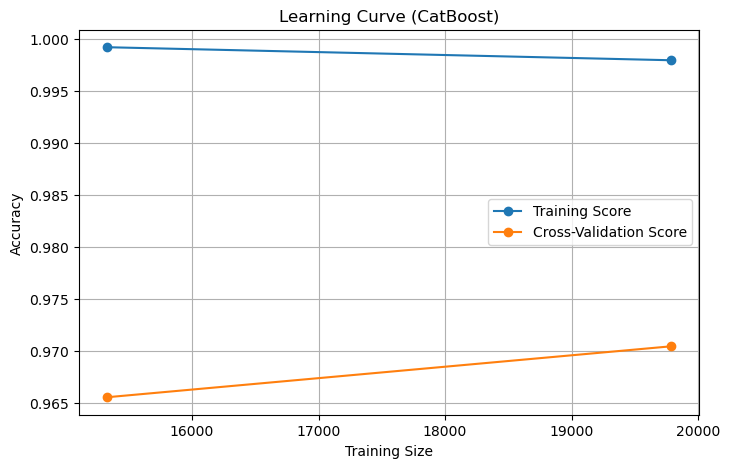

In [11]:
train_sizes, train_scores, test_scores = learning_curve(
    cat, X_smote, y_smote, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.title('Learning Curve (CatBoost)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


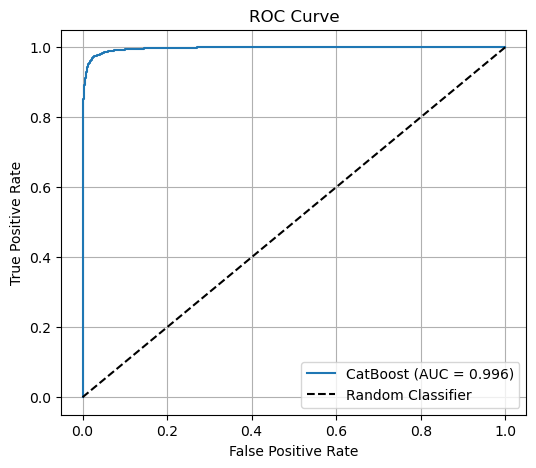

In [12]:
y_proba = cat.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


feature_importance

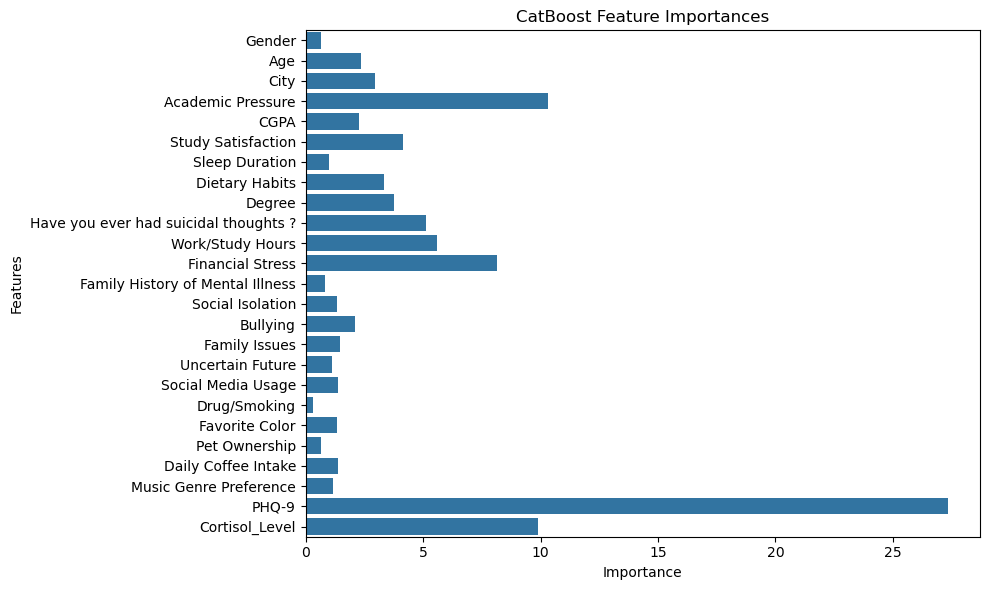

In [13]:
importances = cat.get_feature_importance()
features = X_train.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [14]:
cat = CatBoostClassifier(verbose=0, random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 200, 300]
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=10,  
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_smote, y_smote)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 100, 'depth': 4}
Best Accuracy: 0.963122783726689


Random Search to optimize model performance. 

Complete Catboost Training Accuracy: 0.9717520651608804
Complete catboost Test Accuracy: 0.9714247203127107
Confusion Matrix:
 [[4727   68]
 [ 144 2480]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4795
           1       0.97      0.95      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



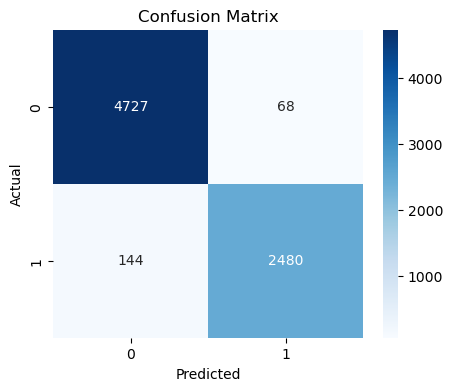

In [15]:
cat = CatBoostClassifier(
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=5,
    iterations=100,
    verbose=0,  
    random_state=42
)


cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)


# accuracy
Tr_score = cat.score(X_train, y_train)
Tst_score = cat.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete Catboost Training Accuracy:", Tr_score)
print("Complete catboost Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



XGBClassifier

In [16]:
#Second model
xgb = XGBClassifier(random_state=42) 
xgb.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

# accuracy
y_pred_xgb = xgb.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGB Training Accuracy: 0.9999422332620876
XGB Test Accuracy: 0.9734465561396415
XGBoost Accuracy: 0.9734465561396415
Confusion Matrix:
 [[4708   87]
 [ 110 2514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.97      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



XGB Training Accuracy: 0.9826122118883946
XGB Test Accuracy: 0.973176978029384
XGBoost Accuracy: 0.973176978029384
Confusion Matrix:
 [[4692  103]
 [  96 2528]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4795
           1       0.96      0.96      0.96      2624

    accuracy                           0.97      7419
   macro avg       0.97      0.97      0.97      7419
weighted avg       0.97      0.97      0.97      7419



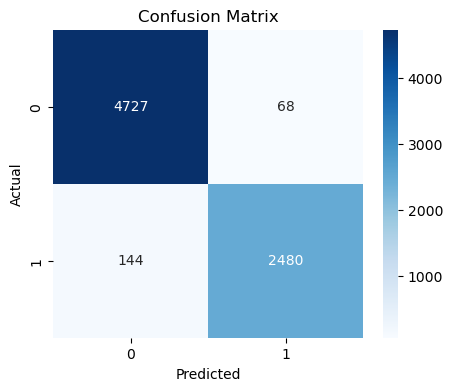

In [17]:
xgb = XGBClassifier(scale_pos_weight=1.5, 
                       max_depth=4,  
                       learning_rate=0.05,  
                       n_estimators=300,  
                       subsample=0.8,  
                       colsample_bytree=0.8,
                       gamma=2,
                       random_state=42) 

xgb.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

# accuracy
y_pred_xgb = xgb.predict(X_test)

print("XGB Training Accuracy:", train_accuracy)
print("XGB Test Accuracy:", test_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
#Check overfitting
cv_scores = cross_val_score(xgb, X_smote, y_smote, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross Validation Scores: [0.94035584 0.94985847 0.9828144  0.98544278 0.98584715]
Mean CV Accuracy: 0.9688637282652648
Standard Deviation: 0.01965615439543187


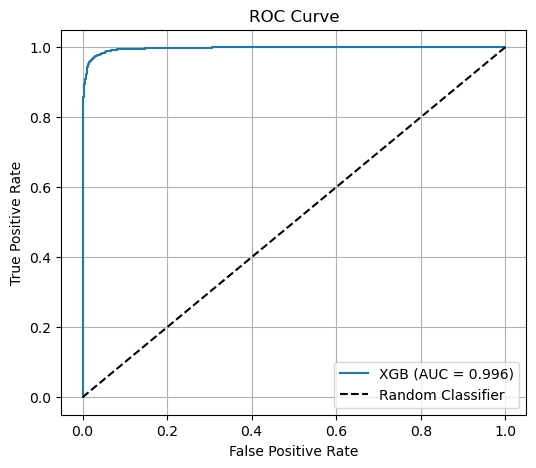

In [19]:
y_proba = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGB (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


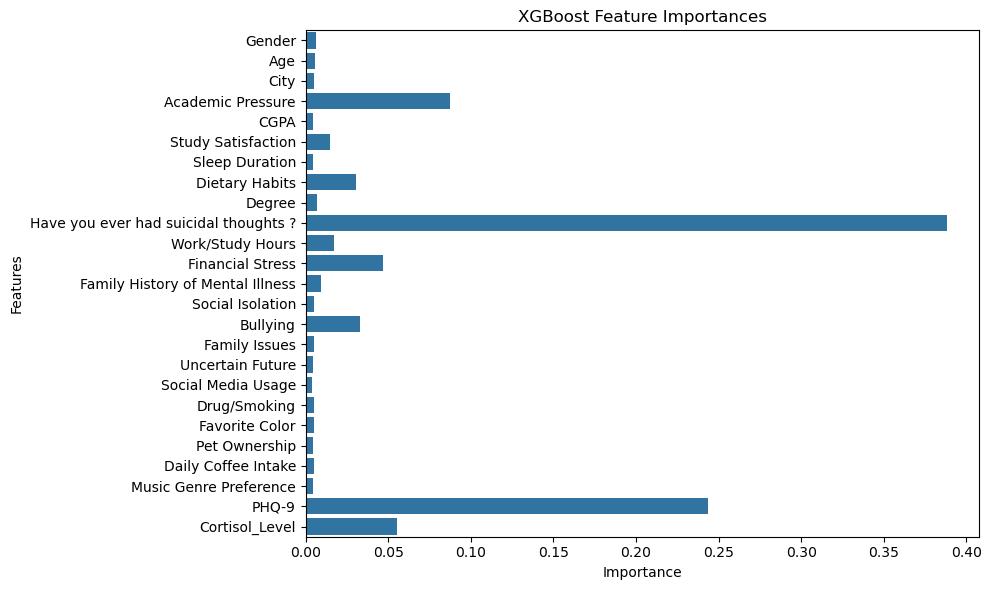

In [20]:
importances = xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



Artificial Neural Networks (ANN)

ANN Training Accuracy: 1.0
ANN Test Accuracy: 0.9583501819652245
Confusion Matrix:
 [[4655  140]
 [ 169 2455]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4795
           1       0.95      0.94      0.94      2624

    accuracy                           0.96      7419
   macro avg       0.96      0.95      0.95      7419
weighted avg       0.96      0.96      0.96      7419



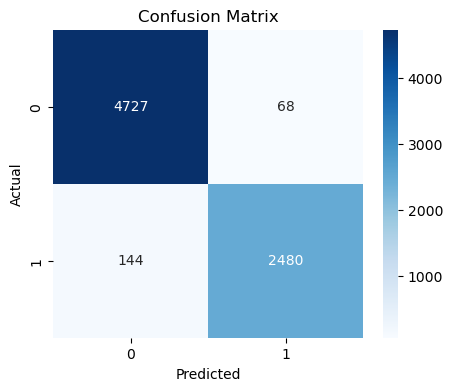

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)


ann_model.fit(X_train, y_train)


y_pred = ann_model.predict(X_test)


train_accuracy = accuracy_score(y_train, ann_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("ANN Training Accuracy:", train_accuracy)
print("ANN Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ANN Training Accuracy: 0.9755646698630929
ANN Test Accuracy: 0.9637417441703734
Confusion Matrix:
 [[4687  108]
 [ 161 2463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4795
           1       0.96      0.94      0.95      2624

    accuracy                           0.96      7419
   macro avg       0.96      0.96      0.96      7419
weighted avg       0.96      0.96      0.96      7419



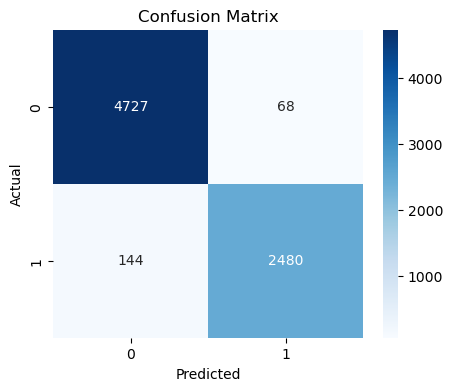

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ann_model = MLPClassifier(hidden_layer_sizes=(32, 16), 
activation='relu', 
max_iter=300, 
alpha=0.05, 
random_state=42,
early_stopping=True,  
validation_fraction=0.1,  
n_iter_no_change=10 )

ann_model.fit(X_train, y_train)


y_pred = ann_model.predict(X_test)


train_accuracy = accuracy_score(y_train, ann_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("ANN Training Accuracy:", train_accuracy)
print("ANN Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
#Check overfitting
cv_scores = cross_val_score(ann_model, X_smote, y_smote, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross Validation Scores: [0.94439951 0.94096239 0.96825718 0.9617873  0.9741205 ]
Mean CV Accuracy: 0.9579053780832997
Standard Deviation: 0.013073885229566115


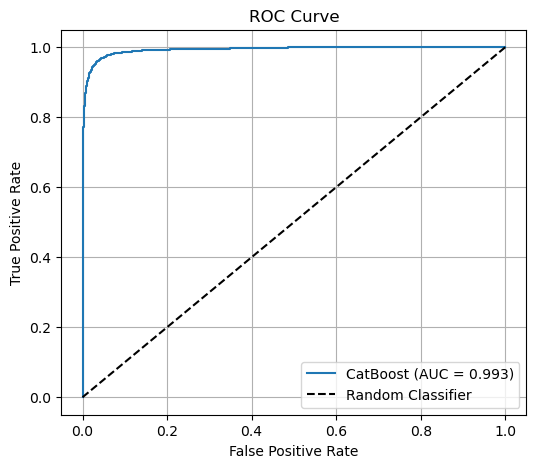

In [24]:
y_proba = ann_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


 Model Performance:
   Model  Accuracy  Precision    Recall  F1 Score
0   CAT  0.971425   0.973312  0.945122  0.959010
1   XGB  0.973177   0.960851  0.963415  0.962131
2   ANN  0.963742   0.957993  0.938643  0.948219

 Best Model Based on F1 Score: XGB (F1 Score = 0.9621)


<Figure size 1000x600 with 0 Axes>

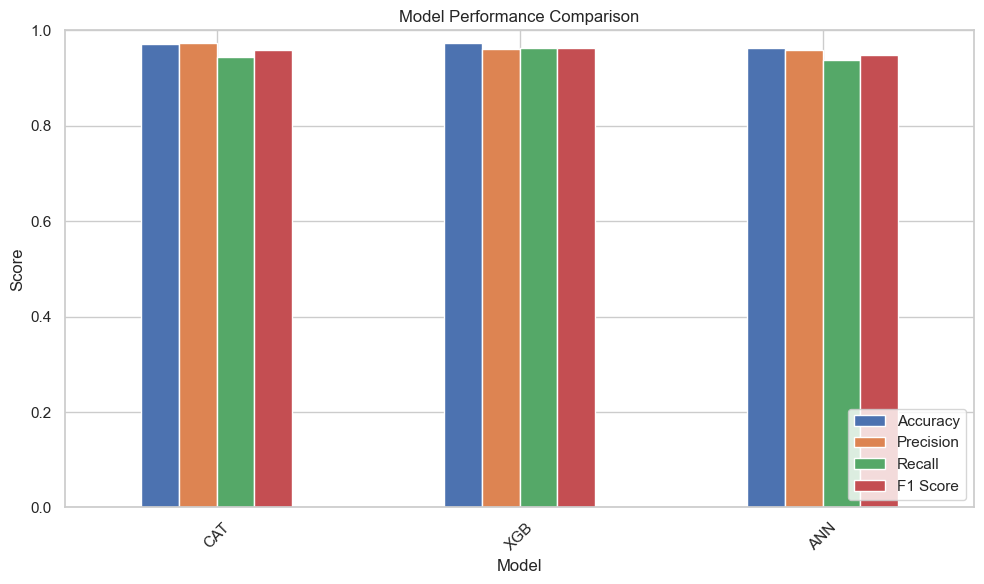

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "CAT": cat,
    "XGB": xgb,
    "ANN": ann_model
}

# Initialize list to store results
results = []

# For best model selection
best_model = None
best_model_name = ""
best_f1 = 0

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_model_name = name

# Create DataFrame for results
results_df = pd.DataFrame(results)
print(" Model Performance:\n", results_df)

# Print best model
print(f"\n Best Model Based on F1 Score: {best_model_name} (F1 Score = {best_f1:.4f})")

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



BEST MODEL >>> XGB CLASSIFIER